In [1]:
print("hello world")

hello world


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
# add you api file from kaggle
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
train_data_path = "/content/train"

In [6]:
import os
os.listdir(train_data_path)

['dogs', 'cats']

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D ,Flatten

In [8]:
# generators
# returns (image, label)
train_ds = keras.utils.image_dataset_from_directory(
    directory=train_data_path,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)  # image will be stretched or squished
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# accessing data
for images, labels in train_ds:
    print(images[0])  # (32, 256, 256, 3)
    print(labels[0])  # (32,)
    break  #

tf.Tensor(
[[[148.00717   132.84375   146.19339  ]
  [170.63864   158.80072   168.75198  ]
  [ 70.27545    66.8067     72.56131  ]
  ...
  [108.25571   126.25571    87.02133  ]
  [113.09573   123.95511    88.52542  ]
  [107.35483   117.35483    82.35483  ]]

 [[172.875     157.30469   173.21094  ]
  [195.87259   183.59134   196.20853  ]
  [ 69.20917    65.74042    71.97479  ]
  ...
  [109.759     127.759      88.52463  ]
  [107.470795  119.953125   82.51953  ]
  [103.42578   114.76172    77.75781  ]]

 [[180.65384   164.72556   184.17868  ]
  [216.67487   204.53424   220.53635  ]
  [ 76.391815   71.31369    80.375    ]
  ...
  [109.4371    127.39374    88.385925 ]
  [104.607574  119.720856   80.720856 ]
  [103.13812   116.92969    78.352264 ]]

 ...

 [[ 60.856567   58.036255   70.26672  ]
  [ 37.187195   38.616882   40.97415  ]
  [ 38.598785   43.528473   35.34488  ]
  ...
  [  4.105072   24.105072   22.105072 ]
  [  4.2265625  23.113281   28.027344 ]
  [  4.2265625  23.059296   29.41

In [10]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# try to reduce overfitting
# create CNN model

from keras.layers import BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
earlyStopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=1,
    mode="auto",
    restore_best_weights=True,
)

In [23]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds, callbacks=[earlyStopping] )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.5341 - loss: 4.8586 - val_accuracy: 0.5612 - val_loss: 0.6873
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.5776 - loss: 0.6907 - val_accuracy: 0.6430 - val_loss: 0.6468
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 79ms/step - accuracy: 0.6412 - loss: 0.6381 - val_accuracy: 0.7132 - val_loss: 0.5944
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 83ms/step - accuracy: 0.6855 - loss: 0.5963 - val_accuracy: 0.6458 - val_loss: 0.6385
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.7223 - loss: 0.5563 - val_accuracy: 0.7094 - val_loss: 0.5659
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 79ms/step - accuracy: 0.7494 - loss: 0.5203 - val_accuracy: 0.7352 - val_loss: 0.5154
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.7644 - loss: 0.4962 - val_accuracy: 0.7320 - val_loss: 0.5228
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 83ms/step - accuracy: 0.7893 - loss: 0.4550 - 

In [16]:
import matplotlib.pyplot as plt


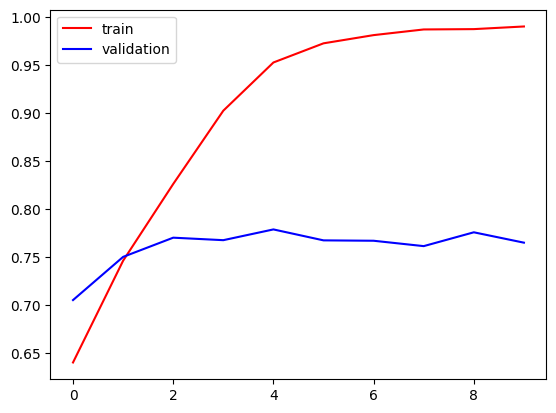

In [17]:
# before improvement
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

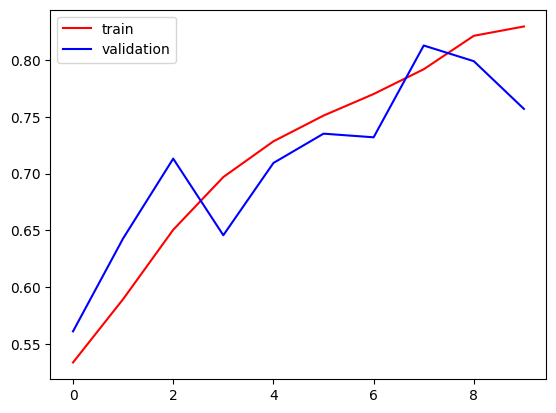

In [24]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

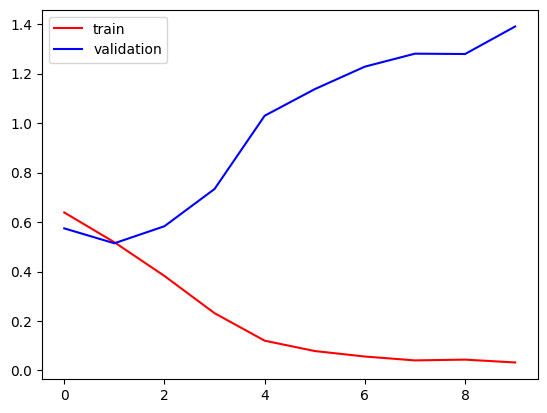

In [18]:
# before improvement
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

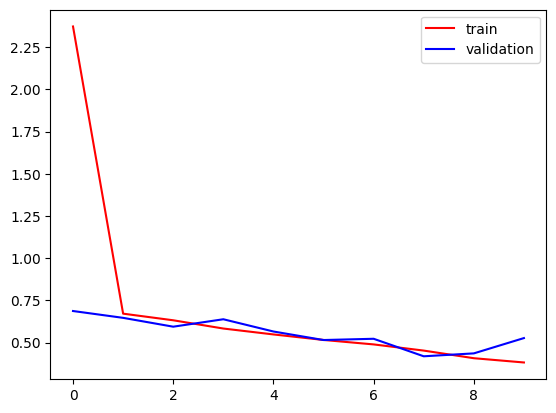

In [25]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()